# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [24]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

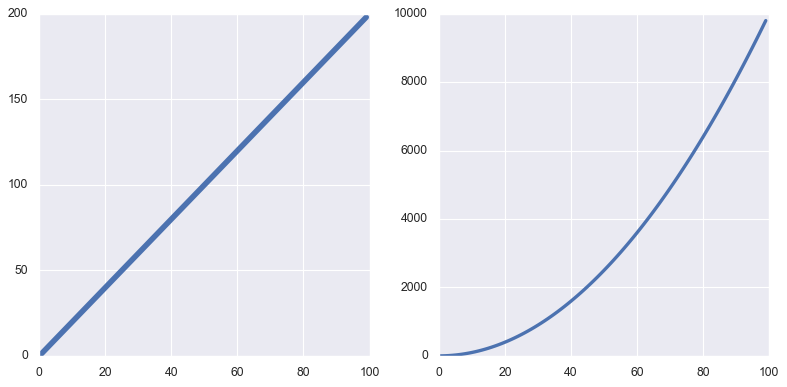

In [44]:
# Method 1


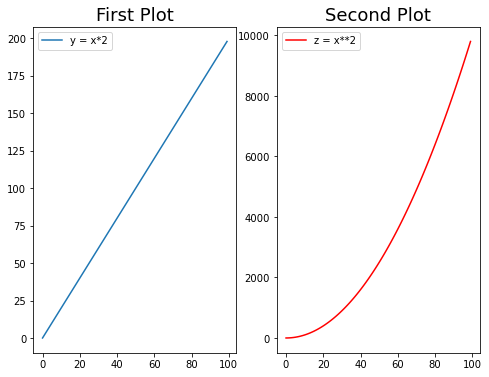

In [28]:
plt.figure(figsize = (8,6))
plt.subplot(1,2,1)
plt.title('First Plot', fontsize=18)
plt.plot(x,y, label='y = x*2')
plt.legend()

plt.subplot(1,2,2)
plt.title('Second Plot', fontsize=18)
plt.plot(x,z, c='red', label='z = x**2')

plt.legend()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

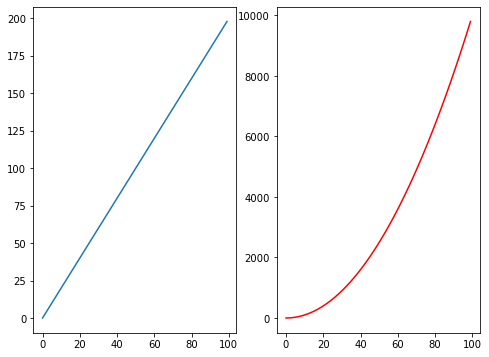

In [23]:
# Method 2
fig, axes2 = plt.subplots(1,2,figsize = (8,6))
ax.set_title('Simple Plot 2', fontsize=18)
axes2[0].plot(x,y, label='y = 2x')
axes2[1].plot(x,z, c='red', label='z = x**2')
ax.legend()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

In [13]:
# your code here


#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

#### As a bonus challenge, try to add a legend to the plot.

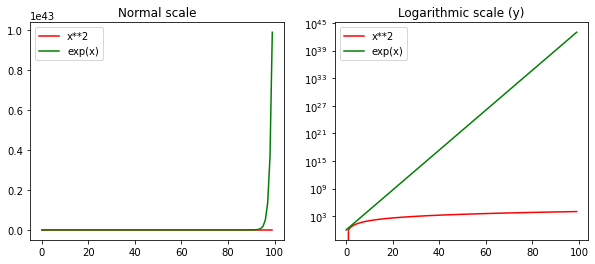

In [13]:
# your code here



In [34]:
y1 = x**2
y2 = math.e**x

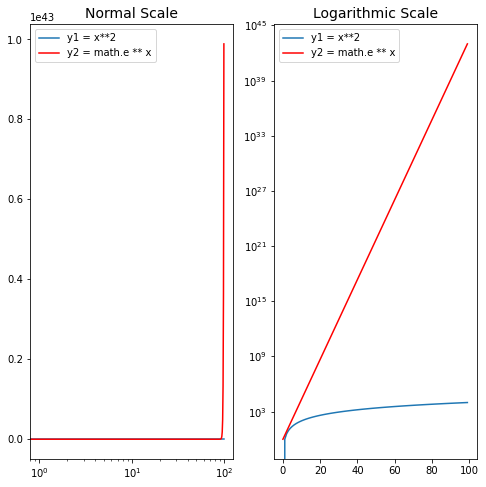

In [45]:
fig, axes2 = plt.subplots(1,2,figsize = (8,8))
axes2[0].set_title('Normal Scale', fontsize=14)
axes2[0].set_xscale("log")
axes2[0].plot(x,y1, label='y1 = x**2')
axes2[0].plot(x,y2, c='red', label='y2 = math.e ** x')
axes2[0].legend()
axes2[1].set_title('Logarithmic Scale', fontsize=14)
axes2[1].set_yscale("log")
axes2[1].plot(x,y1, label='y1 = x**2')
axes2[1].plot(x,y2, c='red', label='y2 = math.e ** x')
axes2[1].legend()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [46]:
# your code here
fitbit_db = pd.read_csv('/Users/timeisenmenger/Desktop/Ironhack /Week5/Week5-Lab4/lab-matplotlib-seaborn/Datasets as CSV/Fitbit2.csv')
fitbit = fitbit_db.copy()

fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [50]:
# your code here


([<matplotlib.axis.XTick at 0x1c4ac3ec220>,
 [Text(0, 0, 'Weekend'), Text(0, 0, 'Workdays')])

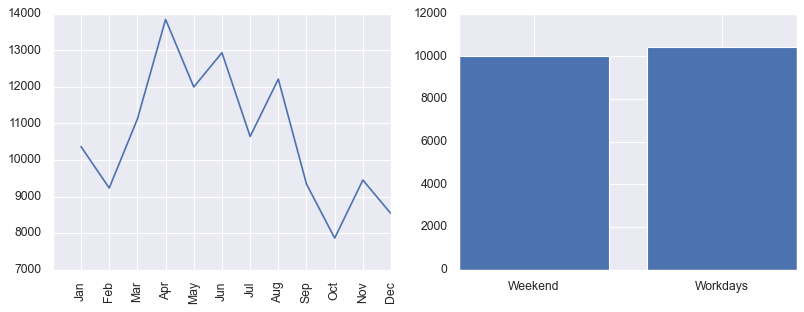

Text(0.5, 1.0, 'Steps per Week/Weekend')

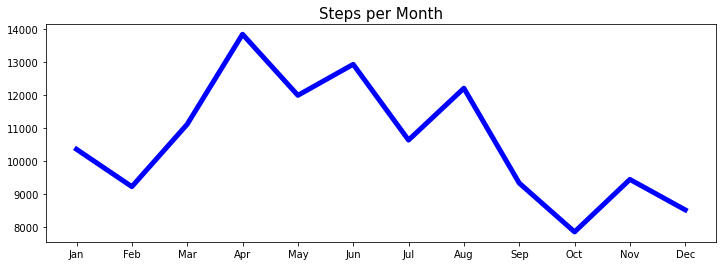

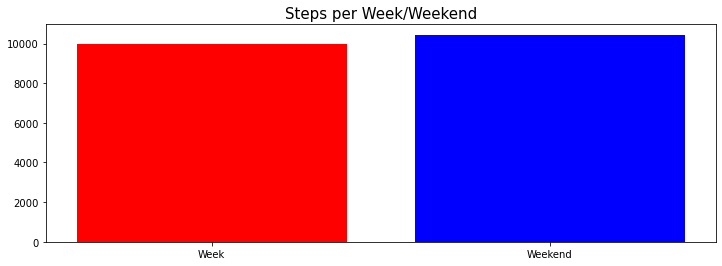

In [54]:
months_steps = fitbit.groupby(['Months_encoded'])['Steps'].median()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(1, figsize=(12, 4))

plt.sca(ax)
ax.plot(months, months_steps, c="b", linewidth=5)
plt.xticks(np.arange(12), months)
ax.set_title('Steps per Month', fontsize=15)


work_or_weekend_steps = fitbit.groupby(['Work_or_Weekend'])['Steps'].median()
week_or_weekend = ['Week', 'Weekend']

fig, ax = plt.subplots(1, figsize=(12, 4))

plt.sca(ax)
ax.bar(week_or_weekend, work_or_weekend_steps, color=['r', 'b'])
plt.xticks(np.arange(2), week_or_weekend)
ax.set_title('Steps per Week/Weekend', fontsize=15)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

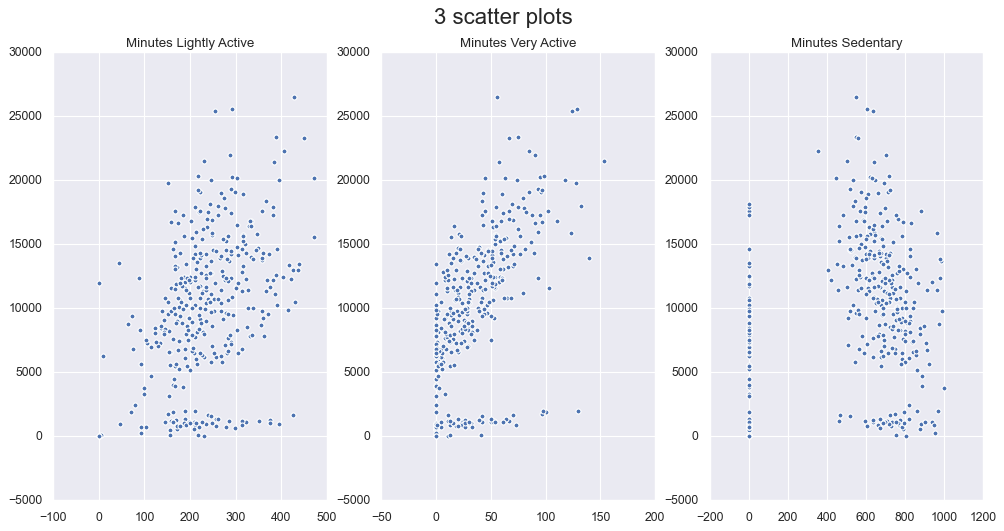

In [53]:
# your code here



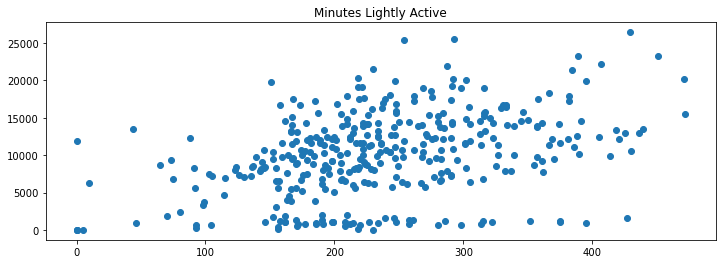

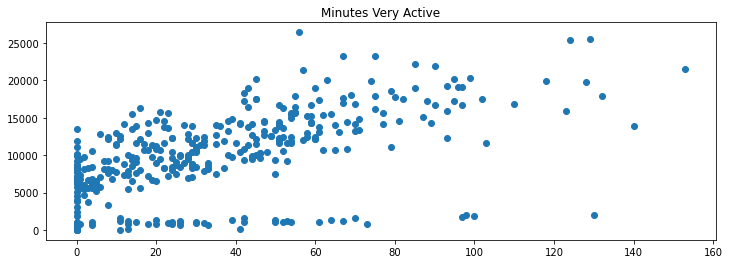

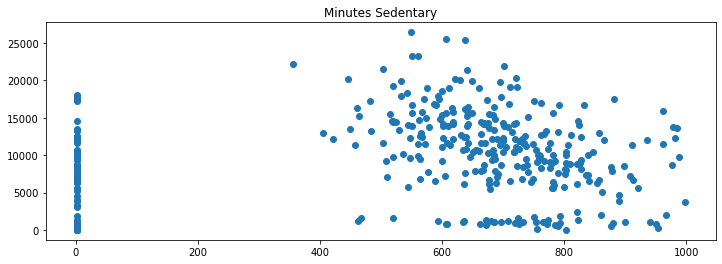

In [50]:
minutes = ['Minutes Lightly Active',
           'Minutes Very Active', 'Minutes Sedentary']

for plot in minutes:
    plt.figure(figsize=(12, 4))
    plt.title(plot)
    plt.scatter(fitbit[plot], fitbit['Steps'])

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [52]:
# your code here
titanic_db = pd.read_csv('/Users/timeisenmenger/Desktop/Ironhack /Week5/Week5-Lab4/lab-matplotlib-seaborn/Datasets as CSV/titanic.csv')
titanic = titanic_db.copy()

titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [53]:
# your code here
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [56]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(['int64', 'float64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [57]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(['object'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [58]:
# your code here 'search for plt set style'

plt.figure(figsize=(12, 6))
plt.style.use('classic')
sns.set_style('white')

<Figure size 864x432 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

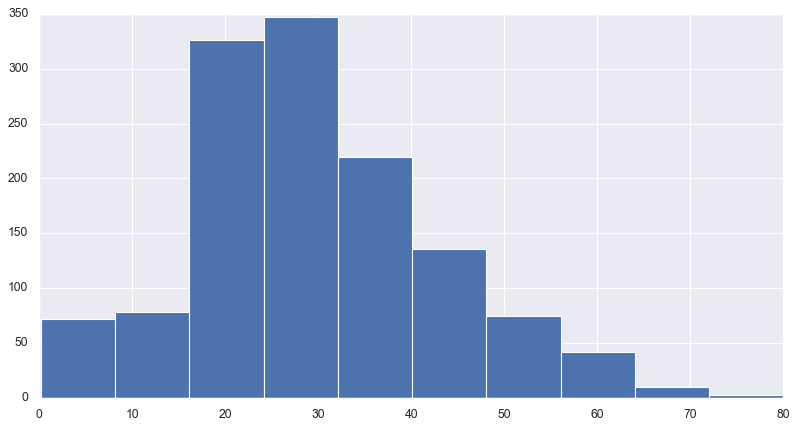

In [59]:
# your code here



(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

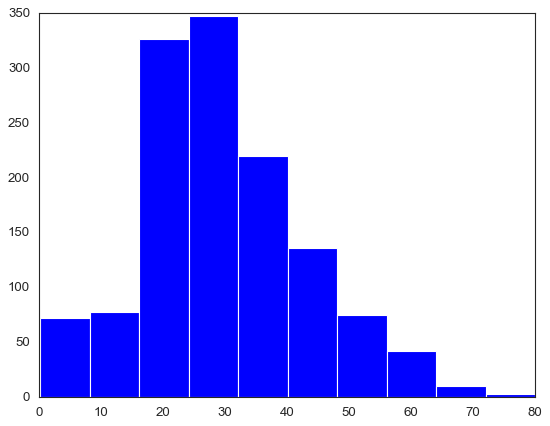

In [59]:
plt.hist(titanic['Age'])

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

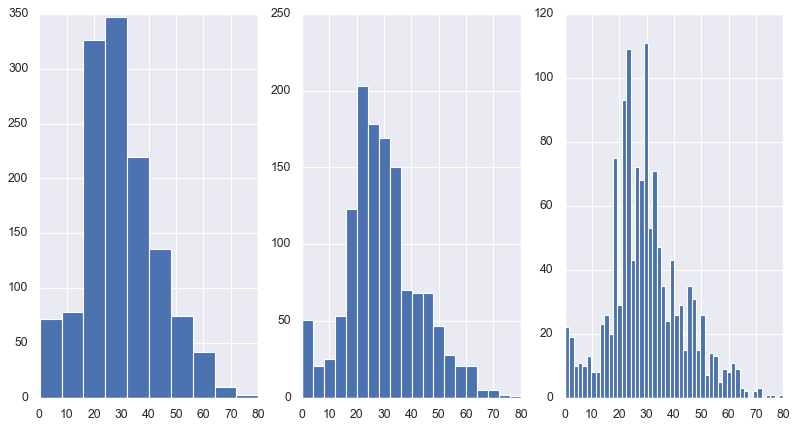

In [60]:
# your code here 


Text(0.5, 1.0, '50 bins')

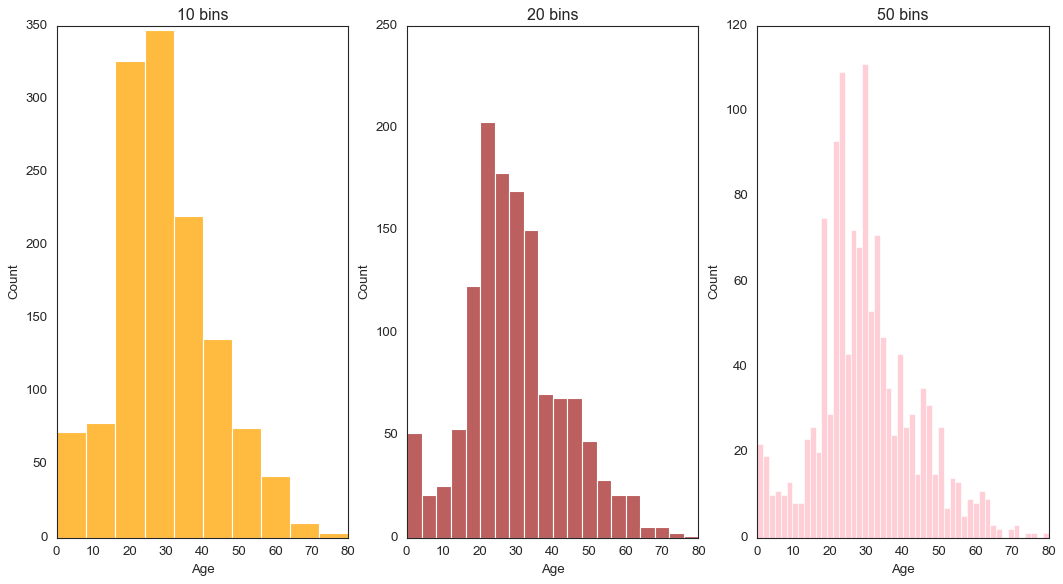

In [60]:
fig7, ax7 = plt.subplots(1, 3, figsize=(16, 8))

sns.histplot(bins=10, color='orange',
             ax=ax7[0], data=titanic['Age']).set_title('10 bins')
sns.histplot(bins=20, color='brown',
             ax=ax7[1], data=titanic['Age']).set_title('20 bins')
sns.histplot(bins=50, color='pink',
             ax=ax7[2], data=titanic['Age']).set_title('50 bins')

#### How does the bin size affect your plot?

In [61]:
# Bin size changes the count scale. The more bins the better because we can see our data more detailed.

#### Use seaborn to show the distribution of column `Age`.

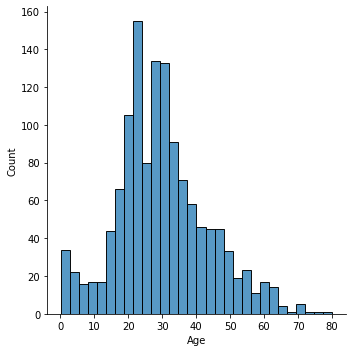

In [10]:
# your code here


<AxesSubplot:xlabel='Age', ylabel='Count'>

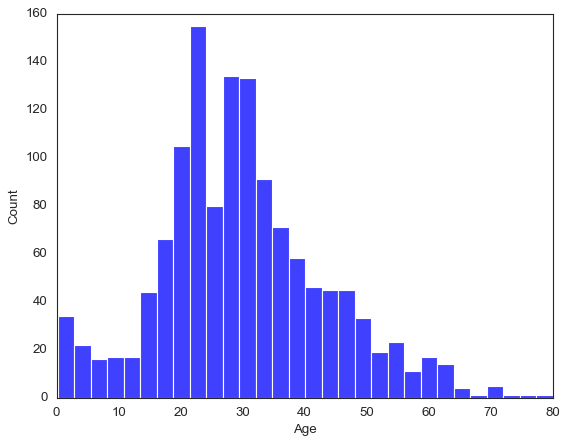

In [62]:
sns.histplot(titanic['Age'])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<BarContainer object of 2 artists>

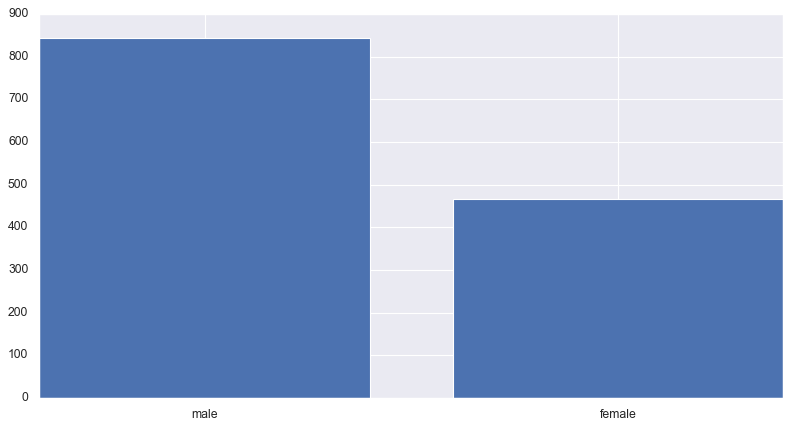

In [63]:
# Method 1 - matplotlib
# your code here


<AxesSubplot:xlabel='Gender', ylabel='count'>

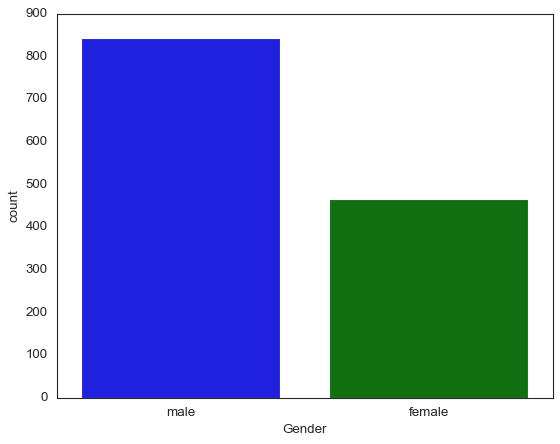

In [63]:
# Method 2 - seaborn
# your code here
sns.countplot(x=titanic['Gender'])

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

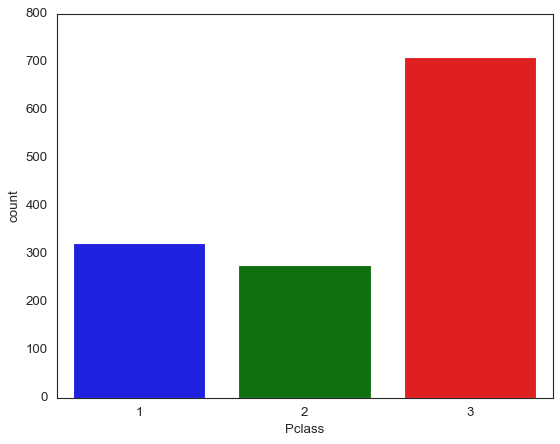

In [64]:
# your code here
sns.countplot(x=titanic['Pclass'])

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:xlabel='Age'>

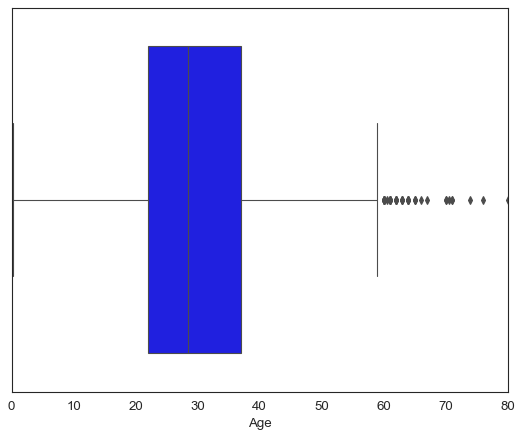

In [65]:
# your code here

sns.boxplot(x=titanic['Age'])

#### What does the last plot tell you about the feature `Age`?

In [ ]:
# Box plot, because it shows summary statistics and outliers. The plot shows the most people are between ~~22 and 38 years old.
# There are just few people that are older than 60 years.

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

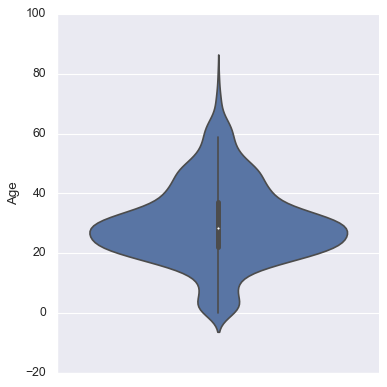

In [310]:
# your code here


<AxesSubplot:xlabel='Age'>

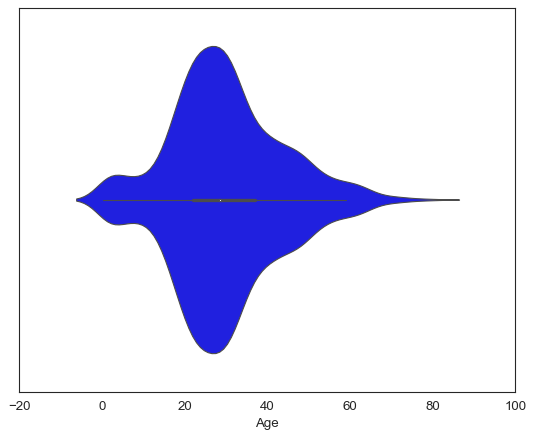

In [66]:
sns.violinplot(data=titanic, x='Age')


#### What additional information does the last plot provide about feature `Age`?

In [68]:
# It shows me that, Age is normal distributed and mode is ~~29

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

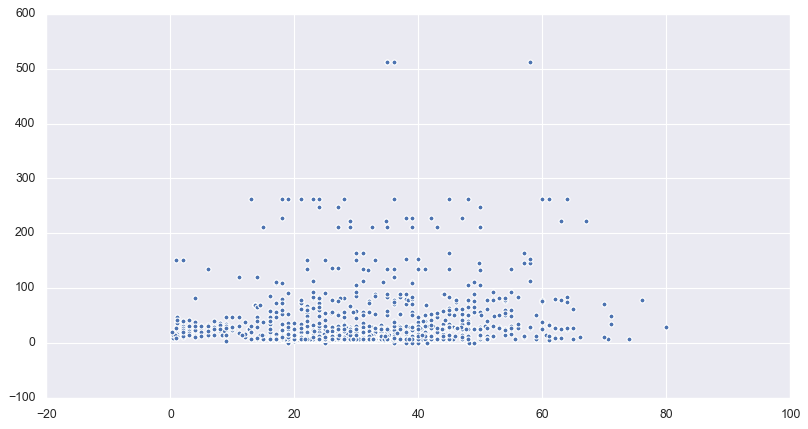

In [357]:
# Method 1 - matplotlib
# your code here


Text(0, 0.5, 'Fare')

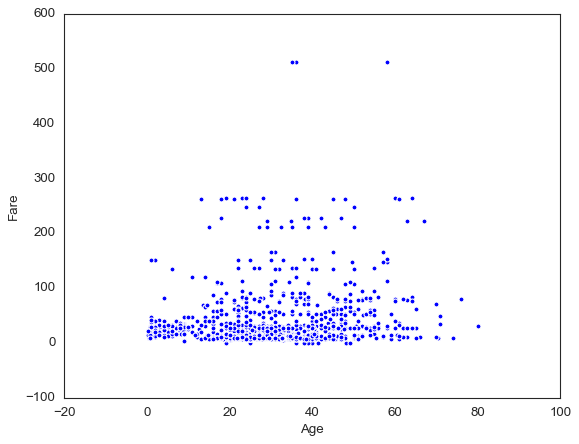

In [69]:
plt.scatter(titanic['Age'], titanic['Fare'])
plt.xlabel("Age")
plt.ylabel("Fare")

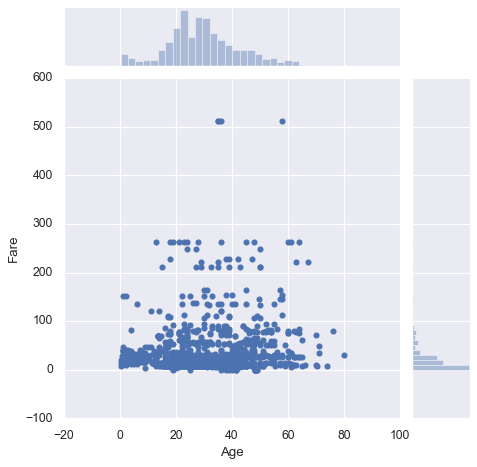

In [319]:
# Method 2 - seaborn 
# your code here 


<AxesSubplot:xlabel='Age', ylabel='Fare'>

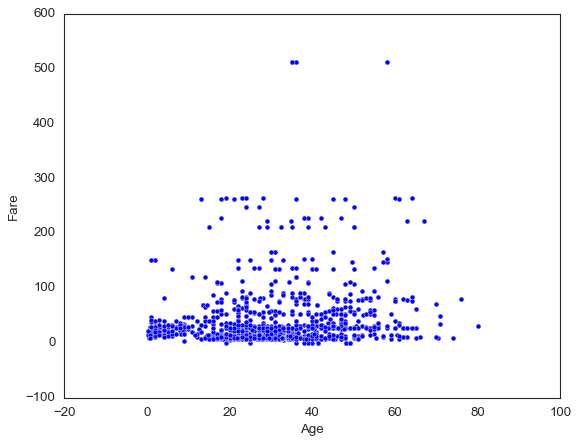

In [70]:
sns.scatterplot(x=titanic['Age'], y=titanic['Fare'])

#### Plot the correlation matrix using seaborn.

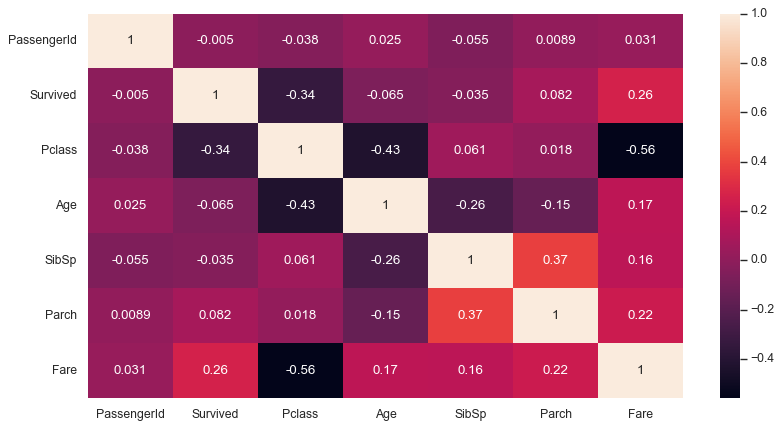

In [331]:
# your code here 'there's a method for this' 


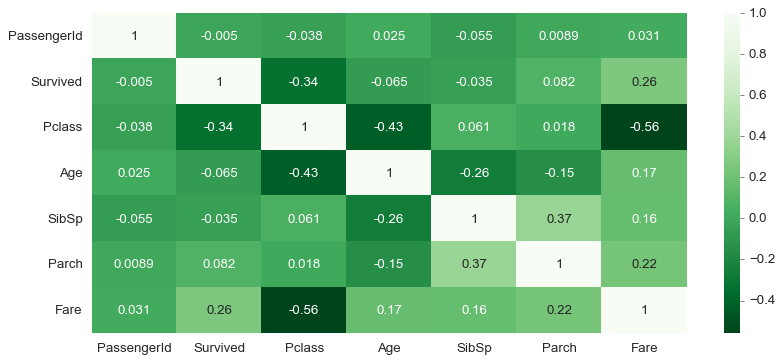

In [71]:
numerical = titanic.select_dtypes(['int64', 'float64'])

plt.figure(figsize=(12, 5))
heatmap = sns.heatmap(numerical.corr(), annot=True, cmap='Greens_r')

#### What are the most correlated features?

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

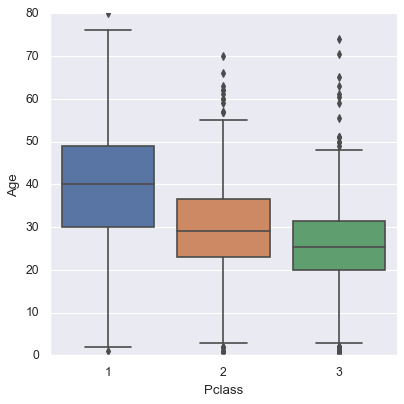

In [79]:
# your code here


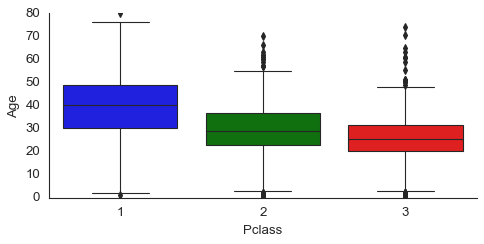

In [72]:
sns.catplot(x='Pclass', y='Age', kind='box', data=titanic, height=3, aspect=2)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

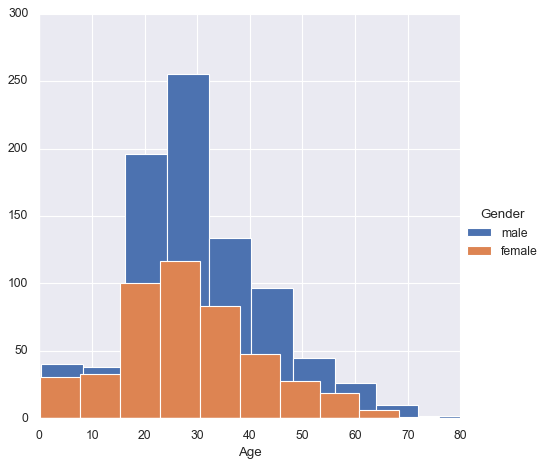

In [81]:
# your code here 


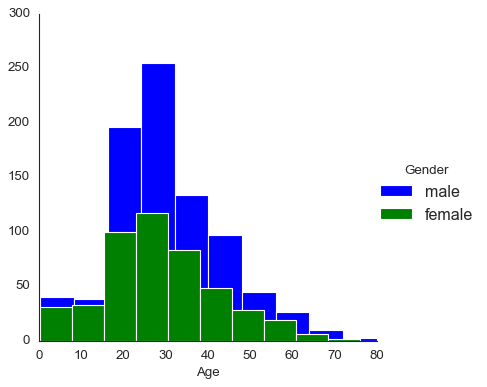

In [73]:
sns.FacetGrid(data=titanic, hue='Gender', height=5).map(
    plt.hist, 'Age').add_legend()